# Diabetes Analysis using Classification [MA981]

###### Khushboo Sunilkumar Jayswal(ID: 2311724) 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Read Dataset

In [2]:
data = pd.read_csv('./diabetes.csv') 

In [3]:
data.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0



1. Age
2. Gender
3. BMI (Body Mass Index)
4. SBP (Systolic Blood Pressure) - High heartbeat measure
5. DBP (Diastolic Blood Pressure) - Low heartbeat measure
6. FPG (Fasting Plasma Glucose)
7. FFPG (Final Fasting Plasma Glucose)
8. Chol (Cholesterol)
9. Tri (Triglyceride) - type of fat in blood with cholesterol
10. HDL (High-Density Lipoprotein)
11. LDL (Low-Density Lipoprotein)
12. ALT (Alanine Amino Transferase)
13. BUN (Blood Urea Nitrogen)
14. CCR (Creatinine Clearance)
15. Smoking Status: (1: Current Smoker, 2: Ever Smoker, 3: Never Smoker, 4&more: Daily Smoker)
16. Drinking Status: (1: Current Drinker, 2: Ever Drinker, 3: Never Drinker, 4&more: Daily Drinker)
17. Family History of Diabetes: (1: Yes, 0: No)
18. Diabetes

In [4]:
data.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,123.219382,76.360446,5.226368,4.860753,1.588476,1.666765,2.976220,26.754810,4.841088,71.557080,5.729084,3.006123,3.209935,0.061585,0.302812
std,14.686155,0.477530,3.397294,17.513858,11.004056,0.781089,0.925377,1.260003,1.079377,0.892196,22.279922,1.251566,16.937394,1.424568,1.199571,0.939842,0.240428,0.459528
min,22.000000,1.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,4.860753,3.200000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000,3.000000,3.000000,0.000000,0.000000
50%,46.000000,1.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,4.760000,72.000000,5.300000,3.000000,3.000000,0.000000,0.000000
75%,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000,3.000000,3.000000,0.000000,1.000000
max,93.000000,2.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,17.730000,307.000000,29.700000,4.860753,4.860753,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

In [6]:
data.shape

(4303, 18)

In [7]:
data.value_counts()

Age  Gender  BMI    SBP  DBP  FPG   Chol  Tri   HDL       LDL       ALT   BUN   CCR    FFPG   smoking   drinking  family_histroy  Diabetes
22   1       25.90  136  75   4.81  5.61  1.84  1.320000  3.190000  65.5  5.47  76.3   5.21   1.000000  3.000000  0               0           1
55   1       27.60  121  86   6.02  4.19  2.29  0.770000  2.260000  26.3  7.89  112.2  6.52   3.000000  3.000000  0               0           1
             25.00  144  92   5.64  4.47  1.37  4.860753  4.860753  37.0  6.05  81.5   5.90   4.860753  4.860753  0               1           1
             25.10  126  80   4.81  3.52  1.96  1.220000  1.670000  42.0  3.80  69.0   7.22   3.000000  3.000000  0               1           1
             25.80  107  87   6.40  5.03  4.03  4.860753  4.860753  38.9  4.21  85.0   8.40   1.000000  3.000000  0               1           1
                                                                                                                                             

#### Checking null values

In [8]:
data.isnull().sum()

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64

In [9]:
data.isnull().all()

Age               False
Gender            False
BMI               False
SBP               False
DBP               False
FPG               False
Chol              False
Tri               False
HDL               False
LDL               False
ALT               False
BUN               False
CCR               False
FFPG              False
smoking           False
drinking          False
family_histroy    False
Diabetes          False
dtype: bool

In [10]:
gender_counts = data['Gender'].value_counts()
gender_proportions = gender_counts / len(data)

diabetes_counts = data['Diabetes'].value_counts()
diabetes_proportions = diabetes_counts / len(data)

print("Gender Proportions:")
print(gender_proportions)

print("\nDiabetes Proportions:")
print(diabetes_proportions)

Gender Proportions:
1    0.648385
2    0.351615
Name: Gender, dtype: float64

Diabetes Proportions:
0    0.697188
1    0.302812
Name: Diabetes, dtype: float64


#### Exploratry Data Analysis

In [11]:
data.corr()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
Age,1.000000,0.004783,0.232346,0.437992,0.230389,0.370798,0.242679,0.163353,0.213133,0.295938,-0.036210,0.276961,0.023667,0.359268,0.244430,0.370963,-0.037955,0.521380
Gender,0.004783,1.000000,-0.252456,-0.125792,-0.186603,-0.073297,0.055566,-0.155444,0.072716,0.001364,-0.235779,-0.147157,-0.602743,-0.049288,0.261566,0.158599,0.066452,0.007251
BMI,0.232346,-0.252456,1.000000,0.328772,0.318889,0.270508,0.173834,0.315455,0.047260,0.201447,0.343488,0.107482,0.155089,0.247893,0.036824,0.105632,0.013928,0.236583
SBP,0.437992,-0.125792,0.328772,1.000000,0.651806,0.263391,0.164950,0.196480,0.089887,0.167468,0.111913,0.143541,0.088885,0.221215,0.139364,0.180866,-0.052285,0.282476
DBP,0.230389,-0.186603,0.318889,0.651806,1.000000,0.178995,0.141619,0.194973,0.048761,0.146217,0.158603,0.087696,0.103241,0.167874,0.037215,0.084919,-0.012258,0.169963
FPG,0.370798,-0.073297,0.270508,0.263391,0.178995,1.000000,0.163499,0.212294,0.201780,0.239304,0.113730,0.169327,0.039803,0.473931,0.278685,0.348008,0.001427,0.515342
Chol,0.242679,0.055566,0.173834,0.164950,0.141619,0.163499,1.000000,0.335038,0.114105,0.651530,0.151360,0.129534,-0.004502,0.106131,0.038658,0.075083,-0.002684,0.124310
Tri,0.163353,-0.155444,0.315455,0.196480,0.194973,0.212294,0.335038,1.000000,0.048405,0.158445,0.245089,0.044594,0.090810,0.165935,-0.004733,0.055889,0.012511,0.169151
HDL,0.213133,0.072716,0.047260,0.089887,0.048761,0.201780,0.114105,0.048405,1.000000,0.655013,0.005198,0.056119,-0.147407,0.244480,0.262487,0.295627,0.039533,0.453618
LDL,0.295938,0.001364,0.201447,0.167468,0.146217,0.239304,0.651530,0.158445,0.655013,1.000000,0.120501,0.129122,-0.061717,0.242597,0.176180,0.254001,0.026949,0.386235


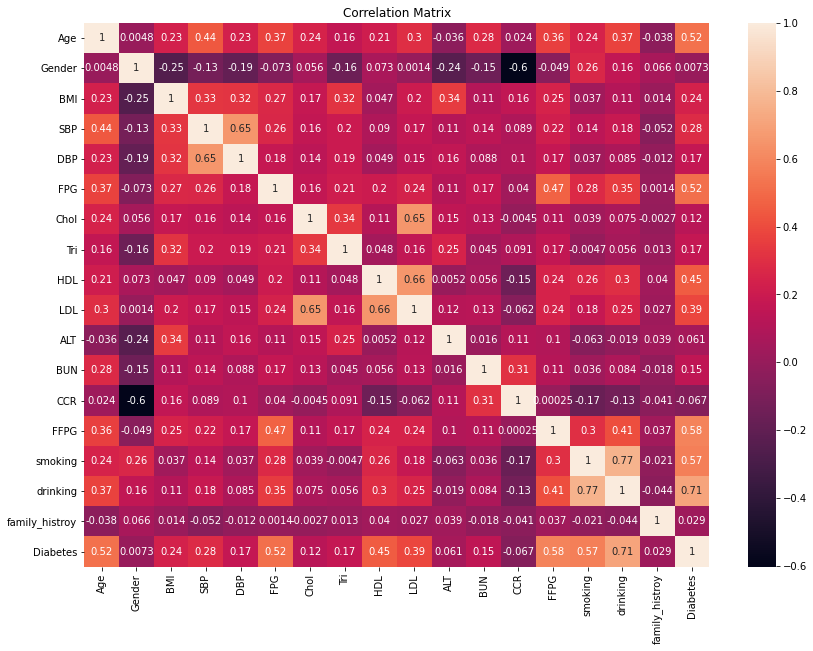

In [12]:
plt.figure(figsize = (14,10))
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')
plt.show()

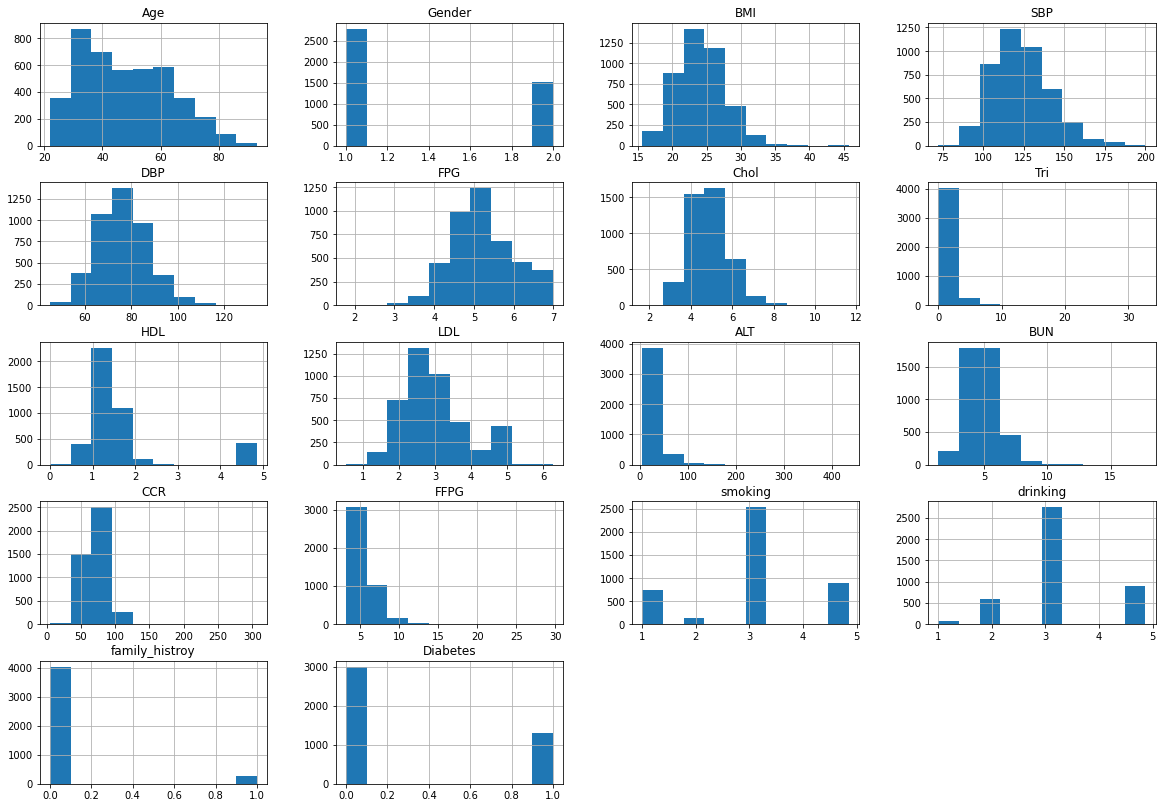

In [13]:
data.hist(figsize=(20, 14))
plt.show()

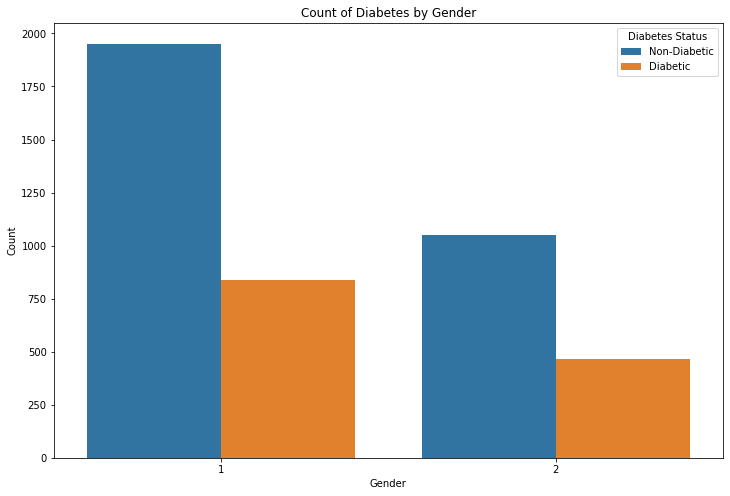

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Gender', hue='Diabetes')
plt.title('Count of Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

###### Above count plot, comparing the heights of the bars for each gender and diabetes status, that identify potential gender disparities in diabetes prevalence. A significantly higher bar for Diabetic in the male category(1) compared to the female category(2) would suggest a higher prevalence of diabetes among males in data.

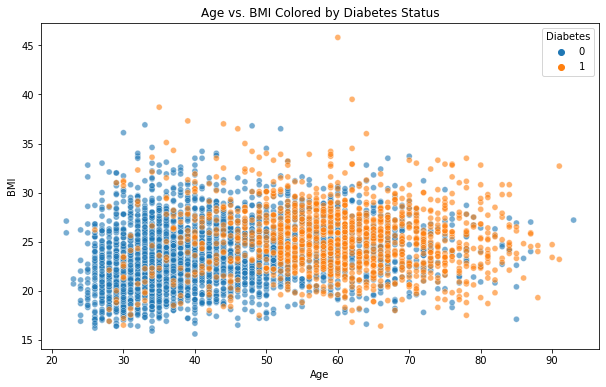

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='BMI', hue='Diabetes', alpha=0.6)
plt.title('Age vs. BMI Colored by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

###### Above scatter plot discribes distribution of points, specify correlations between age and BMI, stratified by diabetes status. A cluster of data points for individuals with high BMI concentrated at specific age ranges. The different colors (Non-Diabetic and Diabetic) can reveal how diabetes status might be associated with the distribution of BMI across age groups. There is  a higher concentration of Diabetic individuals with elevated BMI compared to Non-Diabetics within specific age ranges.

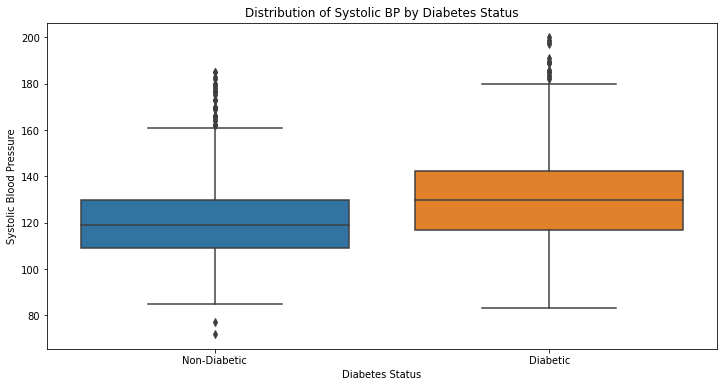

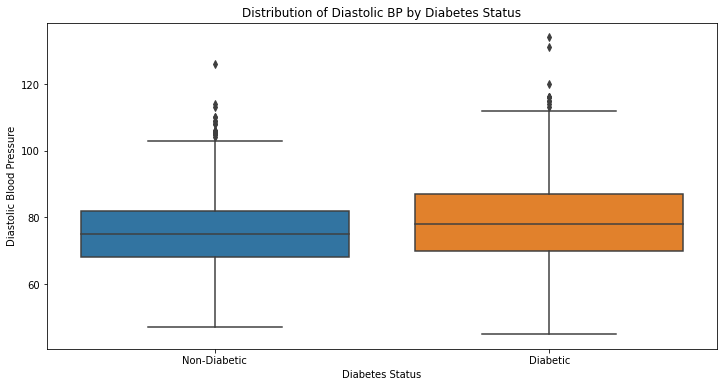

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Diabetes', y='SBP')
plt.title('Distribution of Systolic BP by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Systolic Blood Pressure')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Diabetes', y='DBP')
plt.title('Distribution of Diastolic BP by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Diastolic Blood Pressure')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

###### Above box plot illuminate differences in systolic and diastolic blood pressure distributions between diabetic and non-diabetic populations. The rectangular box defines inter-quartile range of Blood Pressure means middle 50 percent data. The line within box is median value to divide data in two part. The area in box shows minimum and maximum value from mediam. The points outside that identified as outliers.

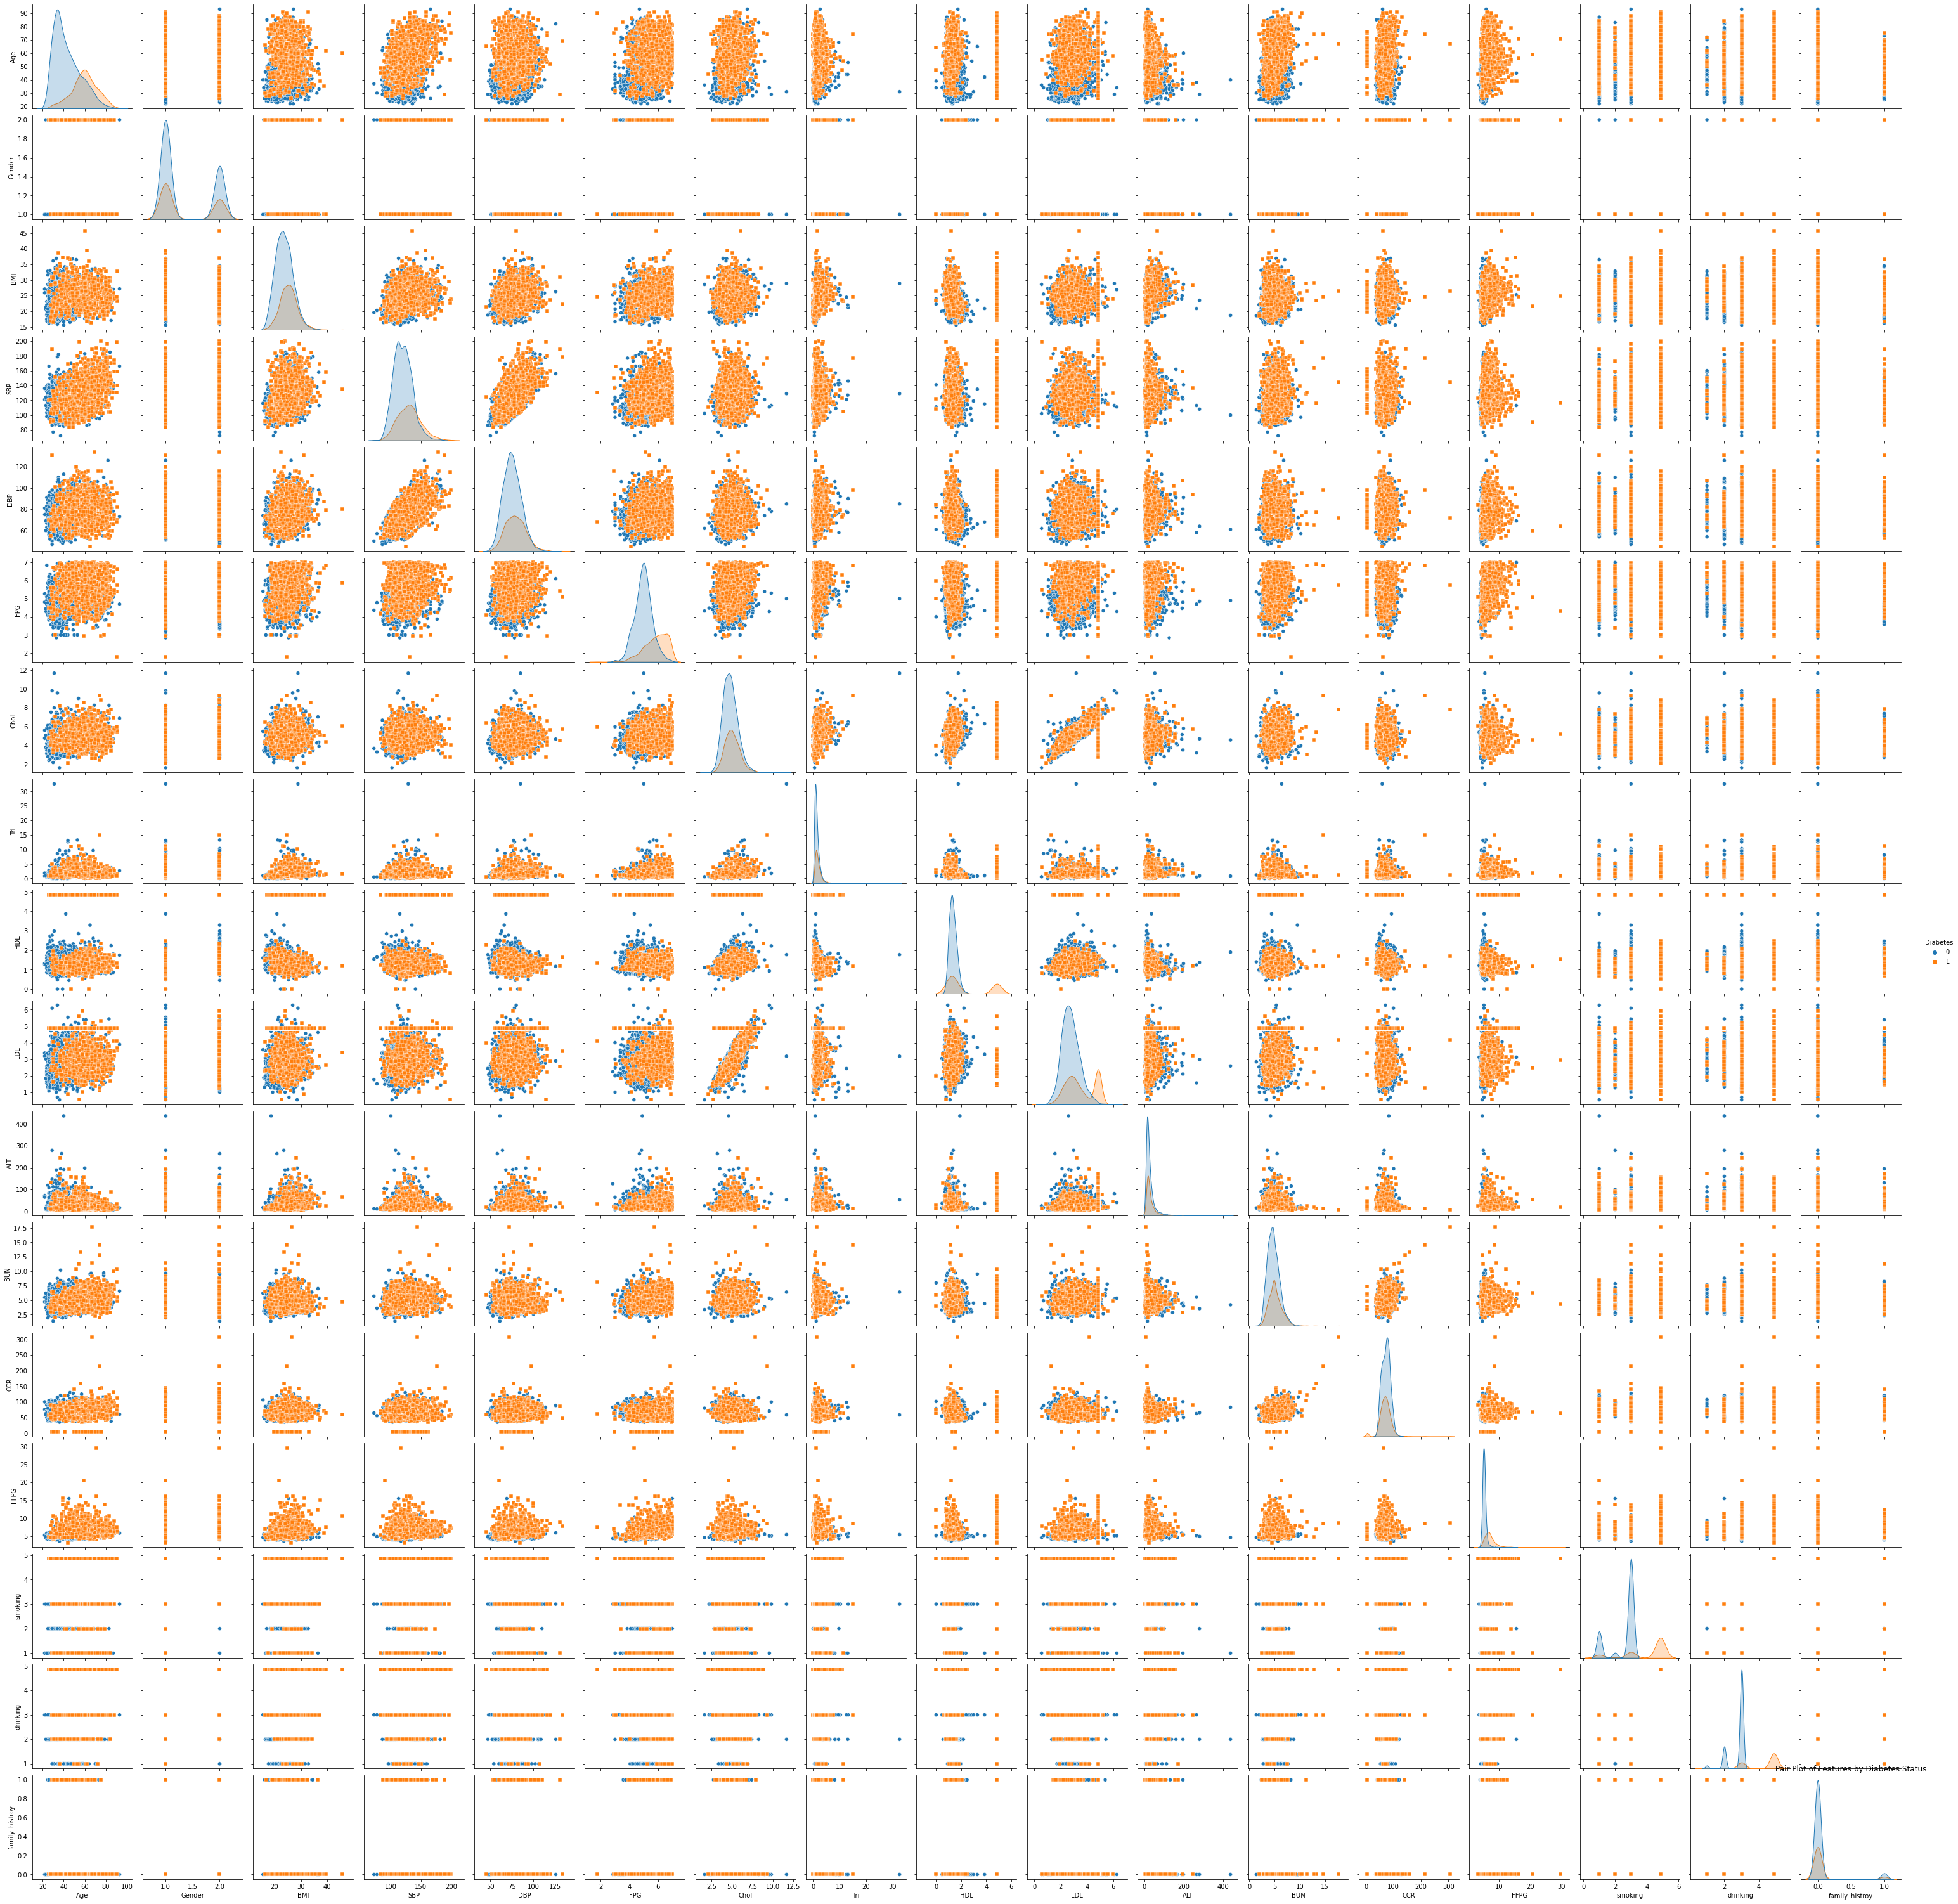

In [17]:
sns.pairplot(data, hue='Diabetes', diag_kind='kde', markers=["o", "s"])
plt.title('Pair Plot of Features by Diabetes Status')
plt.show()

###### In above pairplot, offers different colors or markers represent Non-Diabetic and Diabetic individuals. This allows you to compare how diabetes status might influence the relationship between features. There is some stronger correlation between age and BMI for Diabetic individuals compared to Non-Diabetics.

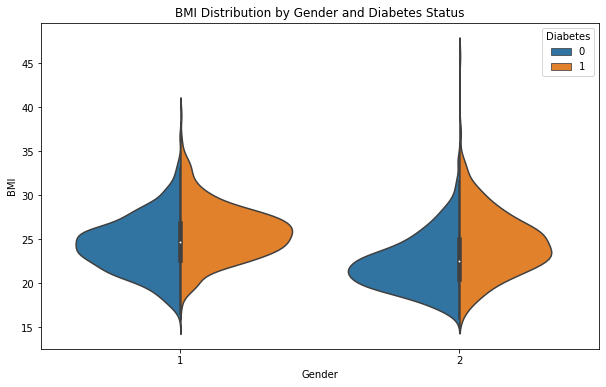

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Gender', y='BMI', hue='Diabetes', split=True)
plt.title('BMI Distribution by Gender and Diabetes Status')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

######  Above violin plot provides distribution of BMI for a specific combination of gender and diabetes status. The wider part of the violin corresponds to the inter-quartile range (IQR), similar to a boxplot. The center line indicates the median BMI value. The "tails" of the violin depict the distribution of data points beyond the IQR.By comparing the shapes we can identify how BMI distribution varies across gender and diabetes status. The position of the median line and the tails reveal differences in central tendency (average BMI) and the range of BMI values.

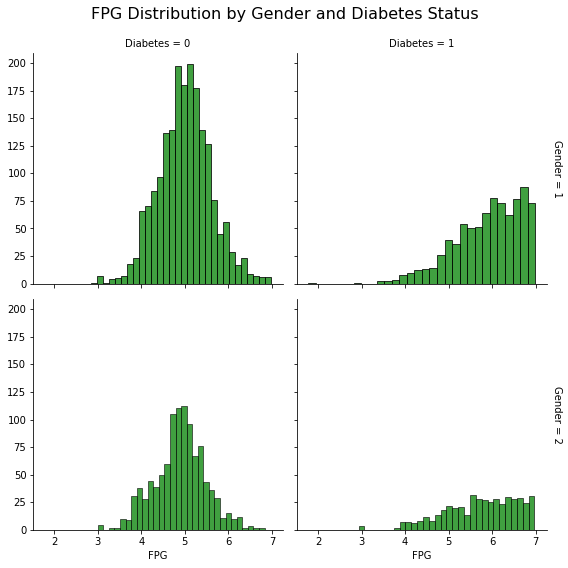

In [19]:
g = sns.FacetGrid(data, col="Diabetes", row="Gender", margin_titles=True, height=4)
g.map(sns.histplot, "FPG", bins=30, color="green")
plt.suptitle('FPG Distribution by Gender and Diabetes Status', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

######  Above hist plot with a peak at a higher FPG value suggests a higher concentration of individuals with elevated glucose levels within that category. The width of the distribution (spread of bars) indicates the variability of FPG levels. A higher peak at elevated FPG levels for the Diabetic facets compared to Non-Diabetic ones within both genders.

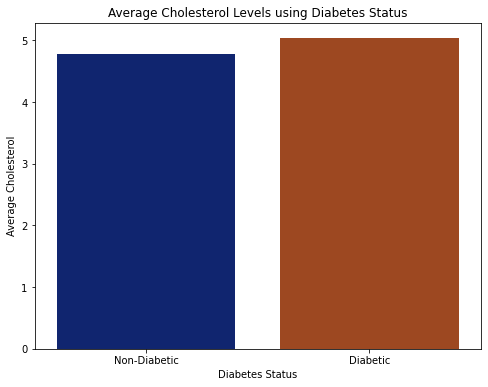

In [20]:
plt.figure(figsize=(8, 6))
avg_chol = data.groupby('Diabetes')['Chol'].mean().reset_index()
sns.barplot(data=avg_chol, x='Diabetes', y='Chol', palette='dark')
plt.title('Average Cholesterol Levels using Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Average Cholesterol')
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()

###### Above bar visually compares the average cholesterol levels between Non-Diabetic and Diabetic individuals. A taller bar for the Diabetic group indicates a higher average cholesterol level compared to Non-Diabetics. This observation suggests a potential association between diabetes and elevated cholesterol levels.

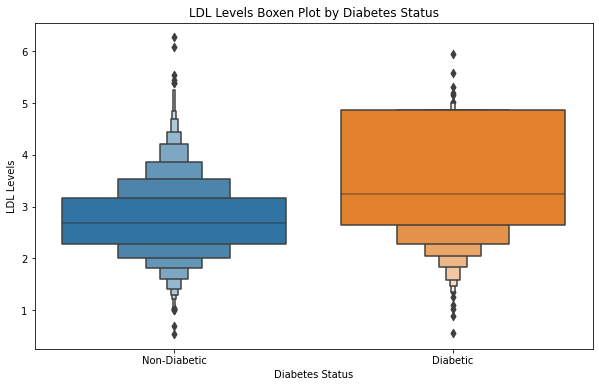

In [21]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=data, x='Diabetes', y='LDL')
plt.title('LDL Levels Boxen Plot by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('LDL Levels')
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()

###### Above boxen plot reveals how LDL levels are distributed across diabetes categories. By comparing the position of the median lines, potential differences in the average LDL levels between Non-Diabetic and Diabetic groups. The size and spread of the boxes and whiskers depict the variability of LDL levels within each diabetes group. A wider box indicates more data points within the IQR, suggesting higher variability. The presence of outliers (data points outside the whiskers) might require further investigation. Higher LDL levels are generally considered a risk factor for cardiovascular diseases. Analyzing the LDL distribution in relation to diabetes status can provide insights into potential risk variations.

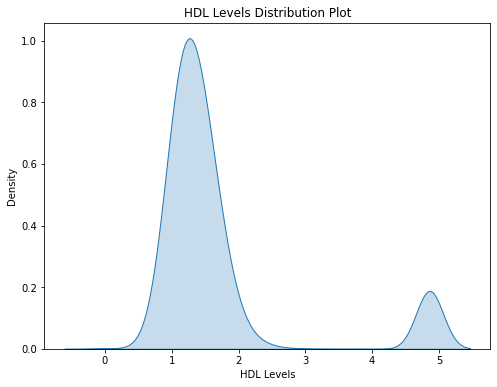

In [22]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['HDL'], fill=True)
plt.title('HDL Levels Distribution Plot')
plt.xlabel('HDL Levels')
plt.ylabel('Density')
plt.show()

###### Above density plot gives a peak at a specific HDL level indicates a higher concentration of individuals with that level. The smoothness of the curve suggests a continuous distribution of HDL values without clear gaps.

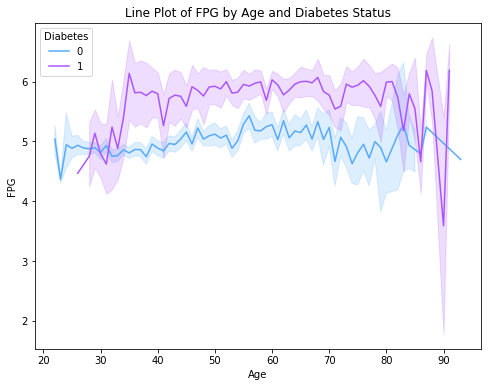

In [23]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='FPG', hue='Diabetes', data=data, palette='cool')
plt.title("Line Plot of FPG by Age and Diabetes Status")
plt.show()

###### This line chart shows the diabetic status according to age and FPG. After the age of 22, the risk of person having diabetic goes higher which shows in purple color. The blue color shows the person without diabetic.

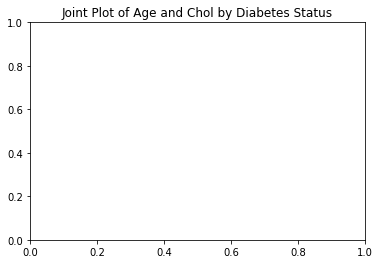

<Figure size 576x576 with 0 Axes>

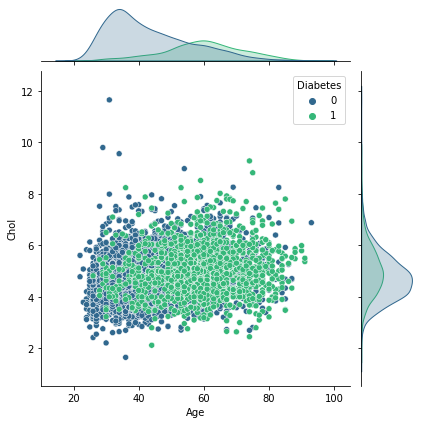

In [24]:
plt.title("Joint Plot of Age and Chol by Diabetes Status")
plt.figure(figsize=(8, 8))
sns.jointplot(x='Age', y='Chol', hue='Diabetes', data=data, palette='viridis')
plt.show()

###### The above joint plot is combination of scatter and density of person having diabetic that shows in green and non diabetic which contains blue color as per age and cholesterol.

#### Train & Test Data

In [25]:
x = data.drop(columns = 'Diabetes')
y = data['Diabetes']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

3442
861
3442
861


#### Models

1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train) 

LogisticRegression()

In [28]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       601
           1       0.92      0.86      0.89       260

    accuracy                           0.93       861
   macro avg       0.93      0.91      0.92       861
weighted avg       0.93      0.93      0.93       861

Confusion Matrix:
 [[581  20]
 [ 36 224]]
Training Score:
 94.2184776292853
Mean Squared Error:
 0.06504065040650407
R2 score is:
 0.6914373480097273


In [29]:
print("Accuracy Score using Logistic Regression:\n",accuracy_score(y_test,y_pred)*100)

Accuracy Score using Logistic Regression:
 93.4959349593496


2. KNeighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [31]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       601
           1       0.67      0.51      0.58       260

    accuracy                           0.78       861
   macro avg       0.74      0.70      0.71       861
weighted avg       0.77      0.78      0.77       861

Confusion Matrix:
 [[536  65]
 [128 132]]
Training Score:
 84.39860546194073
Mean Squared Error:
 0.22415795586527293
R2 score is:
 -0.06343913989504668


In [32]:
print("Accuracy Score using KNeighbors Classifier:\n",accuracy_score(y_test,y_pred)*100)

Accuracy Score using KNeighbors Classifier:
 77.5842044134727


3. Support Vector Classifier

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [34]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       601
           1       0.80      0.70      0.75       260

    accuracy                           0.86       861
   macro avg       0.84      0.81      0.82       861
weighted avg       0.85      0.86      0.85       861

Confusion Matrix:
 [[557  44]
 [ 79 181]]
Training Score:
 87.24578733294595
Mean Squared Error:
 0.14285714285714285
R2 score is:
 0.32226417509279404


In [35]:
print("Accuracy Score using Support Vector Classifier:\n",accuracy_score(y_test,y_pred)*100)

Accuracy Score using Support Vector Classifier:
 85.71428571428571


4. Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [37]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       601
           1       0.89      0.91      0.90       260

    accuracy                           0.94       861
   macro avg       0.93      0.93      0.93       861
weighted avg       0.94      0.94      0.94       861

Confusion Matrix:
 [[572  29]
 [ 24 236]]
Training Score:
 94.68332364904126
Mean Squared Error:
 0.06155632984901278
R2 score is:
 0.7079674900806348


In [38]:
print("Accuracy Score using Gaussian Naive Bayes:\n",gnb.score(x_train,y_train)*100)

Accuracy Score using Gaussian Naive Bayes:
 94.68332364904126


5. Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=232, criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=232)

In [40]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       601
           1       0.91      0.90      0.90       260

    accuracy                           0.94       861
   macro avg       0.93      0.93      0.93       861
weighted avg       0.94      0.94      0.94       861

Confusion Matrix:
 [[577  24]
 [ 27 233]]
Training Score:
 98.54735618826264
Mean Squared Error:
 0.059233449477351915
R2 score is:
 0.7189875847945731


In [41]:
print("Accuracy Score using Decision Tree Classifier:\n",accuracy_score(y_test,y_pred)*100)

Accuracy Score using Decision Tree Classifier:
 94.07665505226481


6. Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       601
           1       0.95      0.90      0.92       260

    accuracy                           0.96       861
   macro avg       0.95      0.94      0.95       861
weighted avg       0.96      0.96      0.96       861

Confusion Matrix:
 [[589  12]
 [ 26 234]]
Training Score:
 100.0
Mean Squared Error:
 0.04413472706155633
R2 score is:
 0.7906182004351722


In [44]:
print("Accuracy Score using Random Forest Classifier:\n",accuracy_score(y_test,y_pred)*100)

Accuracy Score using Random Forest Classifier:
 95.58652729384437


7. Ada Boost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [46]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       601
           1       0.94      0.90      0.92       260

    accuracy                           0.95       861
   macro avg       0.95      0.94      0.94       861
weighted avg       0.95      0.95      0.95       861

Confusion Matrix:
 [[587  14]
 [ 26 234]]
Training Score:
 95.87449157466588
Mean Squared Error:
 0.04645760743321719
R2 score is:
 0.7795981057212338


In [47]:
print("Accuracy Score using AdaBoost Classifier:\n",accuracy_score(y_test,y_pred)*100)

Accuracy Score using AdaBoost Classifier:
 95.35423925667828


8. Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [49]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       601
           1       0.95      0.90      0.93       260

    accuracy                           0.96       861
   macro avg       0.95      0.94      0.95       861
weighted avg       0.96      0.96      0.96       861

Confusion Matrix:
 [[588  13]
 [ 25 235]]
Training Score:
 97.47239976757699
Mean Squared Error:
 0.04413472706155633
R2 score is:
 0.7906182004351722


In [50]:
print("Accuracy Score using Gradient Boost Classifier:\n",accuracy_score(y_test,y_pred)*100)

Accuracy Score using Gradient Boost Classifier:
 95.58652729384437


9. XGB Classifier

In [51]:
from xgboost import XGBClassifier
xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 8)
xgb.fit(x_train, y_train)

XGBClassifier(alpha=8, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=8, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       601
           1       1.00      0.72      0.84       260

    accuracy                           0.92       861
   macro avg       0.95      0.86      0.89       861
weighted avg       0.93      0.92      0.91       861

Confusion Matrix:
 [[601   0]
 [ 72 188]]
Training Score:
 92.44625217896572
Mean Squared Error:
 0.08362369337979095
R2 score is:
 0.6032765902982209


In [53]:
print("Accuracy Score using XGBoost Classifier:\n",accuracy_score(y_test,y_pred)*100)

Accuracy Score using XGBoost Classifier:
 91.63763066202091


10. Extra Trees Classifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [55]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       601
           1       0.98      0.88      0.93       260

    accuracy                           0.96       861
   macro avg       0.96      0.94      0.95       861
weighted avg       0.96      0.96      0.96       861

Confusion Matrix:
 [[596   5]
 [ 31 229]]
Training Score:
 100.0
Mean Squared Error:
 0.041811846689895474
R2 score is:
 0.8016382951491104


In [56]:
print("Accuracy Score using Extra Trees Classifier:\n",accuracy_score(y_test,y_pred)*100)

Accuracy Score using Extra Trees Classifier:
 95.81881533101046


In [57]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
3442,1,1
3472,1,1
1789,0,0
3735,1,1
214,0,0
...,...,...
2357,0,0
2506,0,0
1961,0,0
3802,1,0


In conclussion, we get accuracy using different models are:
* Logistic Regression= 93.49%
* KNeighbors Classifier= 77.58%
* Support Vector Classifier= 85.71%
* Naiye Bayes= 94.68% 
* Decision Tree Classifier= 94.07% 
* Random Forest Classifier= 95.47%
* Ada Boost Classifier= 95.35%
* Gradient Boosting Classifier= 95.70% 
* XGB Classifier= 91.63%
* Extra Trees Classifier= 95.81% 